# 필요한 라이브러리 설치
데이터 분석과 시각화를 위해서는 pandas, numpy, matplotllib, seaborn 등의 라이브러리를 설치해야합니다.

In [3]:
!pip install pandas

     |████████████████████████████████| 10.1 MB 1.9 MB/s eta 0:00:01
     |████████████████████████████████| 509 kB 32.1 MB/s eta 0:00:01
     |████████████████████████████████| 15.3 MB 26.4 MB/s eta 0:00:01


In [4]:
!pip install numpy

In [5]:
!pip install matplotlib

     |████████████████████████████████| 8.5 MB 1.9 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 7.6 MB/s eta 0:00:01
     |████████████████████████████████| 61 kB 300 kB/s  eta 0:00:01


In [6]:
!pip install seaborn

     |████████████████████████████████| 283 kB 2.0 MB/s eta 0:00:01
     |████████████████████████████████| 29.0 MB 22.7 MB/s eta 0:00:01


# 탐색적 데이터 분석

탐색적 데이터 분석은 데이터의 정보를 파악하며 문제해결에 필요한 힌트를 분석하는 과정입니다. 우리가 실제로 접하는 데이터는 가공을 거치지 않은, raw data 이며 탐색적 데이터 분석은 이 raw data 를 열어보는 과정에서부터 시작됩니다.

**탐색적 데이터 분석을 통해서 할 수 있는 것들**
- 데이터의 출처와 주제에 대해서 이해할 수 있습니다.
- 데이터의 크기를 알 수 있습니다.
- 데이터의 구성요소를 살펴볼 수 있습니다. (피처의 속성에 대한 탐색)

**피처의 속성 탐색**

피처의 속성 탐색 과정에서 가장 중요한 것은 '데이터에 질문을 던지는 것'입니다. 피처의 속성 탐색은 당연해보이는 것에 질문을 던지는 것으로 시작합니다.
- '우리 반의 평균 키는 몇이나 될까?'
- '가장 인기있는 메뉴는 무엇일까?'

**피처 간의 상관관계 탐색**

피처 간의 상관관계를 통해 여러 개의 피처가 서로에게 미치는 영향력을 알아볼 수 있습니다. 여기서는 통계적인 개념을 활용하여 피처 간의 공분산, 상관계수와 같은 개념을 포함할 수 있습니다.
- 몸무게와 키는 어떤 관계를 가질까?
- 치폴레 매장에서 치폴레를 구매한 사람은 탄산음료를 같이 구매할까?

**탐색한 데이터의 시각화**

탐색한 데이터를 시각화하는 것 또한 매우 중요합니다. 지금까지의 과정을 통해 어느 정도 데이터를 파악했다면, 패턴이나 인사이트를 눈으로 잘 파악할 수 있도록 시각화를 할 수 있어야 합니다. 
- matplotlib, seaborn 과 같은 시각화 도구를 사용합니다.

# [실습] 멕시코풍 프랜차이즈 chipotle 의 주문 데이터 분석하기

특정 주제나 목적을 가지고 탐색적 분석을 진행할 때에는, 아래처럼 질문의 리스트를 정리해보는 것이 좋습니다.
- 가장 많이 판매된 메뉴 Top 10 은 무엇일까?
- 메뉴별 판매량은 얼마나 될까?
- 메뉴별 가격대는 얼마일까?

### (1) 데이터셋을 git clone 으로 github 로 부터 다운로드 하고 데이터 불러오기

In [8]:
!git clone 'https://github.com/yoonkt200/python-data-analysis'

Cloning into 'python-data-analysis'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 904 (delta 25), reused 34 (delta 12), pack-reused 852
Receiving objects: 100% (904/904), 90.70 MiB | 14.84 MiB/s, done.
Resolving deltas: 100% (514/514), done.


In [16]:
import pandas as pd

file_path = '../Data Analysis/python-data-analysis/data/chipotle.tsv'
chipo = pd.read_csv(file_path, sep='\t')

print(chipo.shape)  # shape 함수는 데이터의 행*열 크기를 반환합니다.
print(chipo.info()) # info 함수는 행의 구성 정보와 열의 구성 정보를 나타냅니다.

(4622, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


**Non-Null Count** 는 결측값이 아닌 데이터를 의미합니다. 뒤집어서 해석하면 총 4622개의 데이터가 있어야 하는데 choice_description 피처의 경우는 1264개의 결측값이 있다는 의미입니다.

데이터 프레임에서 **dtype** 은 자료형이 어떤 타입인지 나타냅니다. **int** 는 정수형(숫자)인 연속형 자료형, **object** 는 문자열이므로 범주형 자료형입니다.

데이터의 전체적인 구조를 살펴보기 위해서는 **head** 함수를 사용합니다. head() 안에 숫자는 몇번째 인덱스까지 데이터를 보여줄 것인지 사용자가 지정할 수 있습니다.

In [17]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


**columns** 는 주로 피처의 내용이 담긴 열의 정보를 출력합니다. **index** 를 활용하면 데이터 하나하나에 접근할 수 있습니다.

In [20]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [21]:
chipo.index # 0 부터 4622 까지의 인덱스가 존재합니다.

RangeIndex(start=0, stop=4622, step=1)

### (2) 연속형 피처 분석하기

quantity 와 item_price 의 수치적 특징을 살펴보겠습니다. 이 두 피처는 연속형 자료형입니다. 그러나 현재 item_price 는 $ 표시가 붙어있기 때문에 문자열로 표현되어있습니다. 이를 연속형 자료형으로 바꿔주기 위해 뒤에서 데이터 전처리를 수행할 것입니다.

In [35]:
# order_id 는 숫자로서의 의미가 없기 때문에 문자열로 변환해줍니다. (삭제하면...다메요...)
chipo['order_id'] = chipo['order_id'].astype(str)

**describe** 는 피처의 기초 요약 통계량을 나타냅니다. 연속형 자료형이 quantity 밖에 없으므로 오직 quantity 에 대한 정보만을 출력할 수 있습니다.

참고로 **quantity 는 아이템의 주문수량**을 의미합니다.

In [25]:
chipo.describe()

,quantity
count,4622.000000
mean,1.075725
std,0.410186
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,15.000000


- count 는 총 데이터의 개수를 의미합니다.
- mean 은 주문수량의 평균, std 는 표준편차를 의미합니다.

### (3) 범주형 피처 분석하기

order_id 와 item_name 의 개수를 탐색합니다. 이 두 피처는 범주형이기 때문에 **unique** 함수를 사용합니다. 이를 통해 피처 내에 몇 개의 범주가 있는지를 확인할 수 있습니다.

In [28]:
len(chipo['order_id'].unique()) # 주문의 고유한 아이디는 1834개입니다. 주문 아이디의 개수는 총 주문량과 다른 개념입니다.

1834

In [29]:
len(chipo['item_name'].unique()) # 메뉴의 종류는 총 50개입니다.

50

### (4) 인사이트의 발견

**1) 가장 많이 주문한 아이템 Top10**

가장 많이 주문한 아이템 10개를 뽑아내기 위해 **value_counts** 함수를 사용할 것입니다. **value_counts** 함수는 말 그대로 value 를 count 해서 반환해줍니다. 중요한 것은 범주형 데이터에서 unique 한 value 를 count 해준다는 것입니다.

In [30]:
item_count = chipo['item_name'].value_counts()[:10]
item_count

Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Steak Burrito          368
Canned Soft Drink      301
Steak Bowl             211
Chips                  211
Bottled Water          162
Chicken Soft Tacos     115
Chicken Salad Bowl     110
Name: item_name, dtype: int64

In [31]:
for idx, (val, cnt) in enumerate(item_count.iteritems(), 1):
    print('Top', idx, ":", val, cnt)

Top 1 : Chicken Bowl 726
Top 2 : Chicken Burrito 553
Top 3 : Chips and Guacamole 479
Top 4 : Steak Burrito 368
Top 5 : Canned Soft Drink 301
Top 6 : Steak Bowl 211
Top 7 : Chips 211
Top 8 : Bottled Water 162
Top 9 : Chicken Soft Tacos 115
Top 10 : Chicken Salad Bowl 110


**2) 아이템별 주문 개수와 총량**

이번에는 **groupby** 함수를 활용해 아이템별 주문 개수와 총량을 구해보겠습니다. **groupby** 함수는 데이터 프레임에서 특정 피처를 기준으로 그룹을 생성하며, 이를 통해 그룹별 연산을 적용할 수 있습니다.

In [34]:
# 아이템별 주문 받은 개수
order_count = chipo.groupby('item_name')['order_id'].count()
order_count[:10]

item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64

In [36]:
# 주문된 아이템의 총량
item_quantity = chipo.groupby('item_name')['quantity'].sum()
item_quantity[:10]

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

**order_id 와 quantity 별 count 개수가 다른 이유는, 한 사람이 같은 아이템 여러 개를 구매하는 경우가 있기 때문입니다.**
예를 들어, Bottled Water 의 주문 받은 개수는 162개인데, 총 주문 아이템의 총량은 211개입니다.
같은 사람이 한번에 주문할 때 여러 개의 생수를 주문하면, 고유 주문 id 는 (주문한 사람이 같으면) 같으므로 count 가 되지 않습니다.
반면, 주문된 아이템의 총량은 말 그대로 생수병이 몇 개 나갔는지를 count 하기 때문에 count 가 됩니다.

**3) 데이터 전처리: 전처리 함수 사용하기**

앞서 살펴본 item_price 피처가 문자열 타입이어서 요약 통계(describe)를 구할 수 없었습니다. 전처리 함수를 통해 숫자형으로 바꿔주면 사용할 수 있습니다.

In [37]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   object
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(1), object(4)
memory usage: 180.7+ KB


In [38]:
chipo['item_price'].head()

0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
Name: item_price, dtype: object

전체 데이터의 자료형을 문자열에서 숫자형으로 바꿔주어야 하기 때문에 **apply** 함수를 사용합니다.

In [40]:
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
# 람다식에서: 문자열 맨 앞에 있는 $는 숫자로 바꿀 수가 없기 때문에 인덱스 1부터 접근해야 합니다.

In [41]:
chipo.describe()

,quantity,item_price
count,4622.000000,4622.000000
mean,1.075725,7.464336
std,0.410186,4.245557
min,1.000000,1.090000
25%,1.000000,3.390000
50%,1.000000,8.750000
75%,1.000000,9.250000
max,15.000000,44.250000


**apply** 함수는 시리즈 단위의 연산을 처리하는 기능을 수행합니다. 따라서 **apply** 함수를 적용하면 피처 단위의 합계나 평균을 구할 수도 있고, 우리가 정의할 새로운 함수 문자열 데이터에서 첫번째 문자열을 제거한 뒤, 나머지 문자열을 수치형으로 바꿔주는 함수를 파라미터로 입력할 수 있습니다.

### (5) 탐색적 분석: 스무고개로 개념적 탐색 분석하기

탐색적 분석의 과정은 마치 데이터와 스무고개 놀이를 하는 과정에 비유할 수 있습니다. 스무고개를 통해 데이터에게 질문하는 것입니다.

In [42]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


**1) 주문당 평균 계산 금액 출력하기**

In [45]:
chipo.groupby('order_id')['item_price'].sum().mean()

18.811428571428568

**2) 한 주문에 10달러 이상 지불한 주문번호 출력하기**

**boolean indexing** 을 활용하면 더 쉽게 구할 수 있습니다.

In [50]:
chipo_order_id_whole_price = chipo.groupby('order_id')['item_price'].sum()
results = chipo_order_id_whole_price[chipo_order_id_whole_price >= 10]
results

order_id
1       11.56
10      13.20
100     10.08
1000    20.50
1001    10.08
        ...  
995     24.95
996     43.00
997     22.50
998     10.88
999     29.25
Name: item_price, Length: 1834, dtype: float64

**index.values** 는 한 주문당 10달러 이상 지불한 주문번호만을 출력할 수 있도록 합니다.

In [48]:
results.index.values

array(['1', '10', '100', ..., '997', '998', '999'], dtype=object)

**3) 각 아이템의 가격 구하기**

해당 데이터에서는 각 아이템의 가격이 나와있지 않으므로, 동일 아이템을 1개만 구매한 주문을 선별해야합니다.
사실 이마저도 정확한 1개의 가격이라고는 할 수 없습니다. item_price 의 최솟값을 통해 유추하는 것입니다. 서브웨이의 샌드위치를 예를 들어서 다 같은 샌드위치이지만 그 조합과 종류에 따라 가격이 조금씩 다른 것처럼 치폴레도 마찬가지인듯합니다.

In [61]:
chipo_one_item = chipo[chipo.quantity==1]
price_per_item = chipo_one_item.groupby('item_name').min()

price_per_item.sort_values(by='item_price', ascending=True)[:10]

,order_id,quantity,choice_description,item_price
item_name,,,,
Bottled Water,1009,1,NaN,1.09
Canned Soda,100,1,[Coca Cola],1.09
Canned Soft Drink,1003,1,[Coke],1.25
Side of Chips,1002,1,NaN,1.69
Chips,1005,1,NaN,1.99
Chips and Fresh Tomato Salsa,1,1,NaN,2.29
Chips and Tomatillo-Red Chili Salsa,1215,1,NaN,2.39
Chips and Tomatillo-Green Chili Salsa,1,1,NaN,2.39
Chips and Roasted Chili-Corn Salsa,1156,1,NaN,2.39


각 아이템의 가격을 그래프로 시각화해서 나타낼 수 있습니다. 단, item_name 이 너무 길기 때문에 **tolist** 함수를 이용하여 array 를 list 로 표현합니다.

In [65]:
import numpy as np

item_name_list = price_per_item.index.tolist()
x_pos = np.arange(len(item_name_list))
item_price = price_per_item['item_price'].tolist()

In [66]:
import matplotlib.pyplot as plt

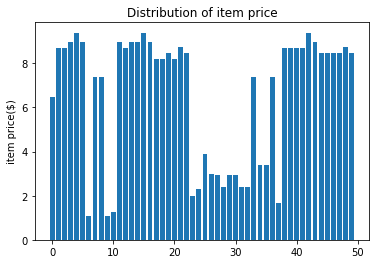

In [69]:
# 아이템별 가격 분포
plt.bar(x_pos, item_price, align='center')
plt.ylabel('item price($)')
plt.title('Distribution of item price')
plt.show()

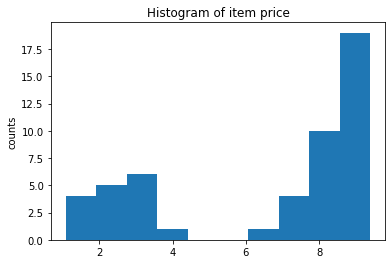

In [70]:
# 아이템 가격 히스토그램. x축이 아이템의 가격으로 얼마나 많은 빈도만큼 등장했는지 보여준다.
plt.hist(item_price)
plt.ylabel('counts')
plt.title('Histogram of item price')
plt.show()

**4) 가장 비싼 주문번호에서 아이템이 총 몇 개 팔렸는지 구하기**

In [71]:
chipo.groupby('order_id').sum().sort_values(by='item_price', ascending=False)[:5]

,quantity,item_price
order_id,,
926,23,205.25
1443,35,160.74
1483,14,139.00
691,11,118.25
1786,20,114.30


고유 주문번호별로 접근할 수 있습니다. 약 205 달러를 지불한 손님이 가장 많이 돈을 냈습니다. 이 손님이 23개의 제품을 구매한 것을 아래 손님이 35개의 제품을 구매한 것과 비교해보면 가장 많은 가격을 지불했다고 해서 가장 많은 제품을 구매한 것은 아닌 것을 알 수 있습니다.

**5) 'Veggie Salad Bowl'이 몇 번 주문되었는지 구하기**

특정 아이템이 총 몇 번 주문되었는지를 확인해보겠습니다. **boolean indexing** 을 활용하여 특정 아이템만을 구매한 경우만을 추출할 수 있습니다. 

**drop_duplicates** 함수는 한 주문 안에서 item_name 이 중복 집계된 경우를 제거해주기 위함입니다.

In [75]:
chipo_veggie = chipo[chipo['item_name']=='Veggie Salad Bowl'].drop_duplicates()
len(chipo_veggie)

18

In [76]:
chipo_veggie.head()

,order_id,quantity,item_name,choice_description,item_price
186,83,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
295,128,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",11.25
455,195,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
496,207,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce, Guacamole...",11.25
960,394,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


**6) 'Chicken Bowl'을 2개 이상 주문한 주문 횟수 구하기**

In [81]:
chipo_chicken = chipo[chipo['item_name']=='Chicken Bowl']
chipo_chicken_ordersum = chipo_chicken.groupby('order_id').sum()['quantity']
results = chipo_chicken_ordersum[chipo_chicken_ordersum >= 2]

len(results)

114